<a href="https://colab.research.google.com/github/bongkyunSON/Machine-Learning/blob/main/MachineLearning_221101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Library and Data load

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_path = "/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/spaceship-titanic/"

train = pd.read_csv(base_path + "train.csv")
test = pd.read_csv(base_path + "test.csv")
print(train.shape, test.shape)

(8693, 14) (4277, 13)


In [ ]:
train.info(memory_usage = 'deep') #dtype이 object인 column은 실제 메모리 사용량과 보여지는게 다르다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 3.7 MB


In [ ]:
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 1.8 MB


### 2. Data Preprocessing

True     4378
False    4315
Name: Transported, dtype: int64

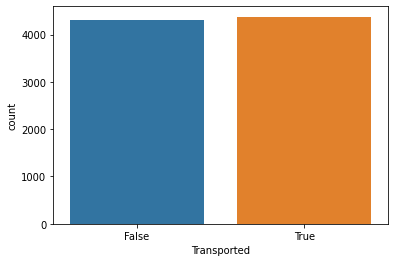

In [ ]:
# 1. 결측치 확인
train[train.isnull().any(axis = 1)]

# 2.dtype이 object인 column
cat_features = train.columns[train.dtypes == 'object']

# 3. target value distibution
sns.countplot(data=train, x="Transported")
train.Transported.value_counts()

In [ ]:
# 1. 결측치 처리
train = train.dropna()

# 2. dtype이 object인 column 처리
train = train.drop(cat_features, axis=1)

# 3. target value encoding
target_map = {True : 1, False : 0}
train.Transported = train.Transported.map(target_map)

train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0


### 3. Data Preparation

 - train, validation data를 만듭니다.

In [ ]:
from sklearn.model_selection import train_test_split

X = train.drop(columns = "Transported") #feature vector
y = train.Transported # target value

# 트테트테(트벨트벨)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(5284, 6) (1322, 6) (5284,) (1322,)


In [ ]:
X_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
7832,25.0,0.0,1673.0,0.0,642.0,612.0
5842,36.0,0.0,2624.0,1657.0,2799.0,1.0
3928,34.0,0.0,0.0,0.0,0.0,0.0
4091,37.0,0.0,0.0,0.0,0.0,0.0
7679,22.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
4984,31.0,0.0,0.0,0.0,0.0,0.0
6864,22.0,28.0,194.0,2.0,0.0,370.0
6919,25.0,0.0,115.0,0.0,1823.0,4041.0
7137,40.0,0.0,21.0,0.0,1503.0,1392.0


### Training

In [ ]:
# 1. SVM
from sklearn.svm import SVC

# 2. RandomForest
from sklearn.ensemble import RandomForestClassifier

clf = SVC(C=100) #C : [0.1 ~ 1000], kernel : 'linear' 
clf2 = RandomForestClassifier(n_estimators=100,
                              max_depth=10, #rule-of-thumb : sqrt(# of geatures)
                              max_features=0.8,
                              random_state=42,
                              n_jobs=2)


clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=0.8, n_jobs=2,
                       random_state=42)

### Evaluation

 - Evaluation metric을 정하고, metric을 기준으로 train, validation 성능을 측정합니다.

In [ ]:
from sklearn.metrics import accuracy_score

pred_train= clf.predict(X_train)
pred_val = clf.predict(X_val)

pred_train2 = clf2.predict(X_train)
pred_val2 = clf2.predict(X_val)

print("----- SVM -----")
print("Train Accuracy : %.4f" % accuracy_score(y_train, pred_train))
print("Validation Accuracy : %.4f" % accuracy_score(y_val, pred_val))
print("\n----- Random Forest -----")
print("Train Accuracy : %.4f" % accuracy_score(y_train, pred_train2))
print("Validation Accuracy : %.4f" % accuracy_score(y_val, pred_val2))

----- SVM -----
Train Accuracy : 0.8055
Validation Accuracy : 0.7965

----- Random Forest -----
Train Accuracy : 0.8577
Validation Accuracy : 0.7958


### 6.Prediction

In [ ]:
##To-DO : test라는 DataFrame을 train과 똑같이 만들어서, X_test를 만들어보세요
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
# 1. 결측치 처리
# train = train.dropna()

# 2. dtype이 object인 column 처리
test = test.drop(cat_features, axis=1)




In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           4186 non-null   float64
 1   RoomService   4195 non-null   float64
 2   FoodCourt     4171 non-null   float64
 3   ShoppingMall  4179 non-null   float64
 4   Spa           4176 non-null   float64
 5   VRDeck        4197 non-null   float64
dtypes: float64(6)
memory usage: 200.6 KB


In [ ]:
###핵심###
"""
test의 test.mean쓰면 안된다 왜냐면 test의 새로운 데이터가 들어오게 되면 평균이 바뀐다. 
test데이터는 절대로 가져다 쓰면 안된다. 예측의 객관성, 정확성이 떨어질수있기 때문이다
그래서 train 데이터 평균으로 쓴다
"""
#data leakage
X_test = test.fillna(train.mean()) # train data의 각 colum별 평균값으로 각 column의 결측치를 채웁니다
X_test


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,27.000000,0.0,0.0,0.0,0.0,0.0
1,19.000000,0.0,9.0,0.0,2823.0,0.0
2,31.000000,0.0,0.0,0.0,0.0,0.0
3,38.000000,0.0,6652.0,0.0,181.0,585.0
4,20.000000,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...
4272,34.000000,0.0,0.0,0.0,0.0,0.0
4273,42.000000,0.0,847.0,17.0,10.0,144.0
4274,28.894036,0.0,0.0,0.0,0.0,0.0
4275,28.894036,0.0,2680.0,0.0,0.0,523.0


In [ ]:
output = clf.predict(X_test)
output

array([1, 0, 1, ..., 1, 1, 1])

### 7 . Make Submission file

In [ ]:
submission = pd.read_csv(base_path + "sample_submission.csv")
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [ ]:
inverse_map = {0 : False, 1 : True}
temp = pd.Series(output).map(inverse_map).values
submission.Transported = temp

In [ ]:
submission.to_csv("submission.csv", index=False)